# __Predicting the price of AirBnB__

##__1. Data Cleaning__

Identified the necessary features for the analysis. Dealt with null values and outliers.

In [61]:


# Packages 
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import folium
from folium.plugins import HeatMap
import plotly.io as pi
pi.renderers.default = "colab" 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
pyo.init_notebook_mode(connected=True)



In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#import dataset 
path_ps = '/content/drive/MyDrive/AB_US_2020.csv'
airbnb_df = pd.read_csv(path_ps, usecols=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','city'])
airbnb_df.head(5) 


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



id                                               name  host_id  \
0   38585    Charming Victorian home - twin beds + breakfast   165529   
1   80905                                   French Chic Loft   427027   
2  108061  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
3  155305                 Cottage! BonPaul + Sharky's Hostel   746673   
4  160594                                Historic Grove Park   769252   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
0    Evelyne                 NaN         28804  35.65146  -82.62792   
1    Celeste                 NaN         28801  35.59779  -82.55540   
2       Lisa                 NaN         28801  35.60670  -82.55563   
3    BonPaul                 NaN         28806  35.57864  -82.59578   
4  Elizabeth                 NaN         28801  35.61442  -82.54127   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     60               1                138    16/02/20   
1  Entire home/apt    470               1                114    07/09/20   
2  Entire home/apt     75              30                 89    30/11/19   
3  Entire home/apt     90               1                267    22/09/20   
4     Private room    125              30                 58    19/10/15   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.14                               1                 0   
1               1.03                              11               288   
2               0.81                               2               298   
3               2.39                               5                 0   
4               0.52                               1                 0   

        city  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville

In [64]:
airbnb_df.shape

(226030, 17)

In [65]:
airbnb_df.ndim

2

In [66]:
#data information
#airbnb_df.dtypes
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

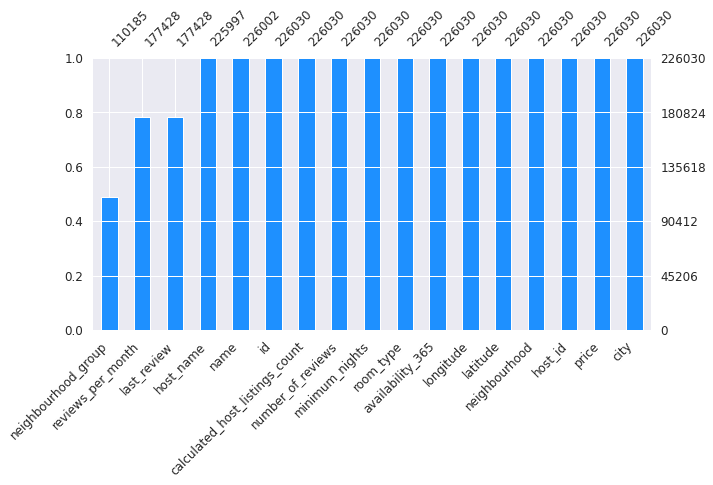

In [67]:
# missing data overview
missing = airbnb_df.isna().sum()
missing
msno.bar(airbnb_df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [68]:
#drop useless variables - 'name','neighbourhood','neighbourhood_group','host_name','last_review'
drop_list = ['name','neighbourhood','neighbourhood_group','host_name','last_review']
airbnb_df.drop(airbnb_df[drop_list], axis=1, inplace=True)
airbnb_df.head(5)

id  host_id  latitude  longitude        room_type  price  \
0   38585   165529  35.65146  -82.62792     Private room     60   
1   80905   427027  35.59779  -82.55540  Entire home/apt    470   
2  108061   320564  35.60670  -82.55563  Entire home/apt     75   
3  155305   746673  35.57864  -82.59578  Entire home/apt     90   
4  160594   769252  35.61442  -82.54127     Private room    125   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                138               1.14   
1               1                114               1.03   
2              30                 89               0.81   
3               1                267               2.39   
4              30                 58               0.52   

   calculated_host_listings_count  availability_365       city  
0                               1                 0  Asheville  
1                              11               288  Asheville  
2                               2               298  Asheville  
3                               5                 0  Asheville  
4                               1                 0  Asheville

In [69]:
#checking airbnb_df1 information after dropping useless variables 
airbnb_df.info()
airbnb_df.shape
missing1 = airbnb_df.isna().sum()
missing1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   host_id                         226030 non-null  int64  
 2   latitude                        226030 non-null  float64
 3   longitude                       226030 non-null  float64
 4   room_type                       226030 non-null  object 
 5   price                           226030 non-null  int64  
 6   minimum_nights                  226030 non-null  int64  
 7   number_of_reviews               226030 non-null  int64  
 8   reviews_per_month               177428 non-null  float64
 9   calculated_host_listings_count  226030 non-null  int64  
 10  availability_365                226030 non-null  int64  
 11  city                            226030 non-null  object 
dtypes: float64(3), i

id                                    0
host_id                               0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 48602
calculated_host_listings_count        0
availability_365                      0
city                                  0
dtype: int64

In [70]:
#dropping missing values
airbnb_df1 = airbnb_df.dropna()
missing2 = airbnb_df1.isna().sum()
missing2



id                                0
host_id                           0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [71]:
#checking number of rows and columns after removing missing values
airbnb_df1.shape

(177428, 12)



```
# This is formatted as code
```

## __2. EDA__

### Basic statistics

In [93]:
airbnb_df1.describe()

id       host_id       latitude      longitude  \
count  1.774280e+05  1.774280e+05  177428.000000  177428.000000   
mean   2.349823e+07  8.449619e+07      35.728741    -103.247427   
std    1.263624e+07  9.067049e+07       6.789461      25.967295   
min    1.090000e+02  2.300000e+01      18.920990    -159.714900   
25%    1.368938e+07  1.212612e+07      32.770550    -121.570070   
50%    2.338574e+07  4.673526e+07      37.259625    -104.874350   
75%    3.446794e+07  1.339236e+08      40.722143     -76.987305   
max    4.549250e+07  3.679176e+08      47.734620     -70.995950   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  177428.000000    1.774280e+05      177428.000000       177428.00000   
mean      184.520188    5.723698e+02          43.958738            1.43145   
std       430.596928    2.374045e+05          68.832735            1.68321   
min         0.000000    1.000000e+00           1.000000            0.01000   
25%        75.000000    1.000000e+00           4.000000            0.23000   
50%       116.000000    2.000000e+00          16.000000            0.81000   
75%       195.000000    5.000000e+00          54.000000            2.06000   
max     24999.000000    1.000000e+08         966.000000           44.06000   

       calculated_host_listings_count  availability_365  
count                   177428.000000     177428.000000  
mean                        11.391404        157.951518  
std                         33.375799        138.129585  
min                          1.000000          0.000000  
25%                          1.000000          1.000000  
50%                          2.000000        139.000000  
75%                          5.000000        305.000000  
max                        393.000000        365.000000

In [94]:
#numeric data information [M]
numeric_features = airbnb_df1.select_dtypes(include=['int64','float64']).columns
numeric_features

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [95]:
#nominaldata information [M]
nominal_features = airbnb_df1.select_dtypes(include=['object'])
nominal_features

room_type             city
0          Private room        Asheville
1       Entire home/apt        Asheville
2       Entire home/apt        Asheville
3       Entire home/apt        Asheville
4          Private room        Asheville
...                 ...              ...
225936  Entire home/apt  Washington D.C.
225950  Entire home/apt  Washington D.C.
225955  Entire home/apt  Washington D.C.
225964  Entire home/apt  Washington D.C.
226002  Entire home/apt  Washington D.C.

[177428 rows x 2 columns]

### Density Plot

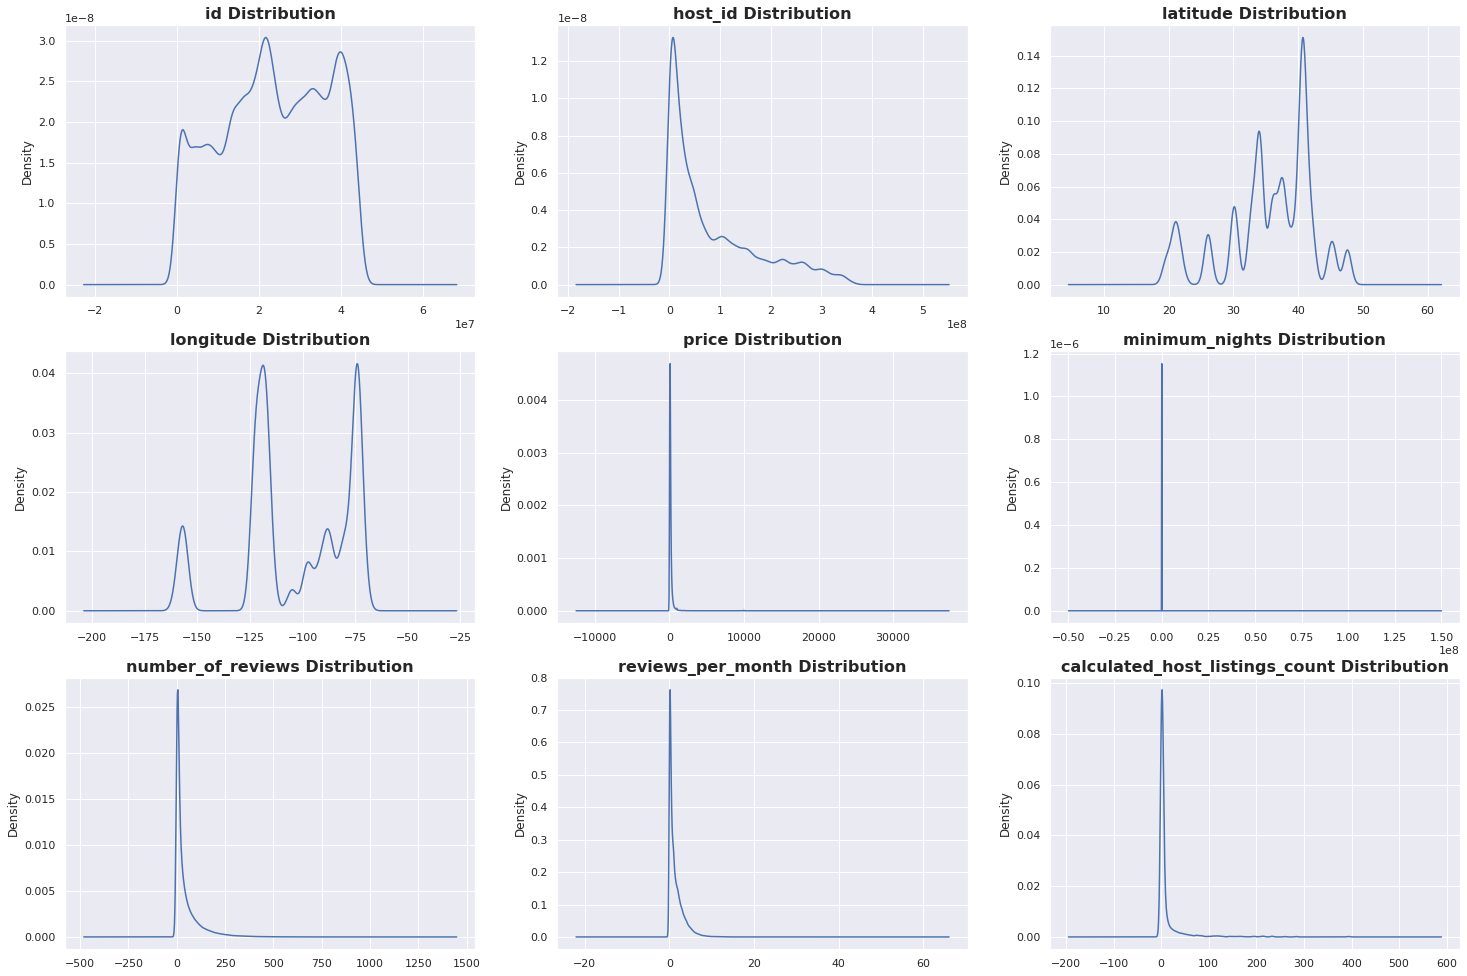

In [96]:
#[M]
fig, axes = plt.subplots(nrows=3, ncols=3)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        airbnb_df1[numeric_features[aux]].plot(kind='kde',ax=col)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

In [97]:
print("\n 95% Quantile :- ",airbnb_df1['price'].quantile(.95))
#print("\n 25% Quantile :- ",airbnb_df1['price'].quantile(.25))



 95% Quantile :-  485.0


In [98]:
# Removing outliers [M]
lower_bound = .0
upper_bound = .95
airbnb_df2 = airbnb_df1[airbnb_df1['price'].between(airbnb_df1['price'].quantile(lower_bound), airbnb_df1['price'].quantile(upper_bound), inclusive=True)].reset_index(drop=True)

#airbnb_df2 = airbnb_df2[airbnb_df2['number_of_reviews'] > 0]
#airbnb_df2 = airbnb_df2[airbnb_df2['calculated_host_listings_count'] < 10]
#airbnb_df2 = airbnb_df2[airbnb_df2['number_of_reviews'] < 200]
#airbnb_df2 = airbnb_df2[airbnb_df2['minimum_nights'] < 10]
#airbnb_df2 = airbnb_df2[airbnb_df2['reviews_per_month'] < 5]
#print(airbnb_df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



### Correlation Plot

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

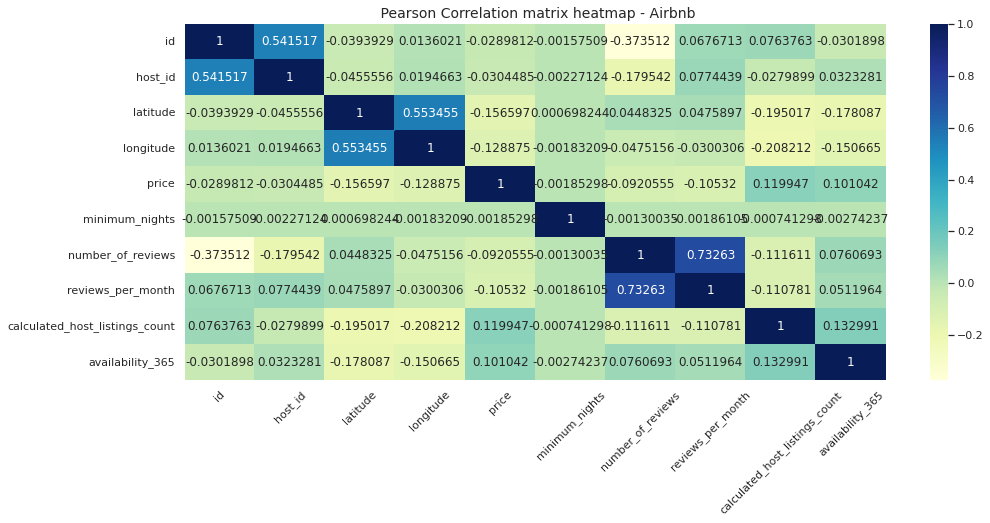

In [99]:
#correlation with data 'airbnb_df2' [PS]

sns.set(rc={'figure.figsize':(15,8)})
corr_map = airbnb_df2.corr()
sns.heatmap(corr_map,annot=True, cmap='YlGnBu',fmt='g')
plt.title(" Pearson Correlation matrix heatmap - Airbnb", size=14)
plt.tight_layout()
plt.xticks(rotation=45)

#plt.savefig('heatmap_airbnb.jpg',dpi=150, figsize=(15,8))

In [100]:
# what is +ve correlated with price [AV]
pos_corr = corr_map['price'] > 0
corr_map['price'][pos_corr].sort_values(ascending = False).to_frame()

price
price                           1.000000
calculated_host_listings_count  0.119947
availability_365                0.101042

###**Top Listing count**

In [101]:
#Total number of airbnb listings in the US [PS]
total_list= airbnb_df2['host_id'].value_counts().sum()
print("Total count of listings in the US :", total_list)

#doubt

Total count of listings in the US : 168601


In [102]:
#list of hosts with top airbnb listing [PS]
top_host_id = airbnb_df2['host_id'].value_counts().head(10)
print("Top 10 Airbnb Hosts in the US \n", top_host_id)
print("Total count of listings by top 10 hosts :", sum(top_host_id))

Top 10 Airbnb Hosts in the US 
 48005494     653
8534462      286
229095817    272
30787515     206
2154262      196
24831061     188
15820446     186
107434423    186
111808435    183
18839434     156
Name: host_id, dtype: int64
Total count of listings by top 10 hosts : 2512


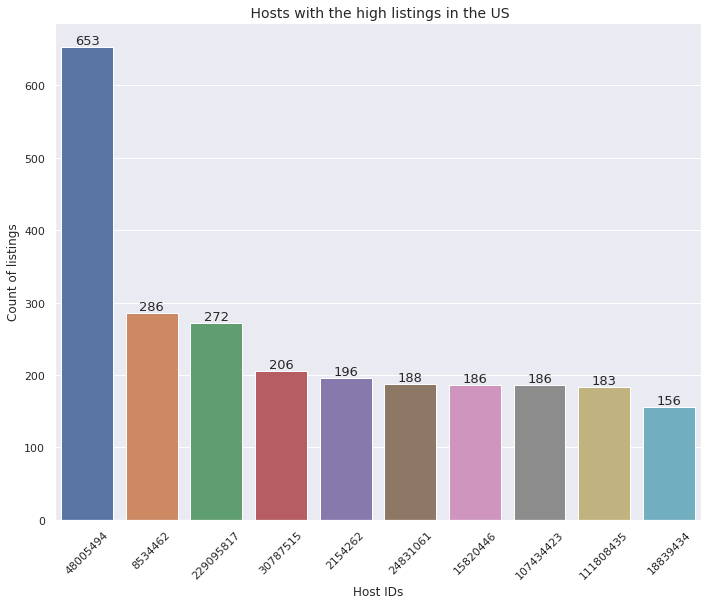

In [103]:
#plotting graph of Hosts with the high listings in the US [PS]
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x="host_id", data=airbnb_df2, order=airbnb_df2.host_id.value_counts().head(10).index),
plt.title(" Hosts with the high listings in the US", size=14)
plt.xlabel('Host IDs')
plt.ylabel('Count of listings')
plt.tight_layout()
plt.xticks(rotation=45)
#data value labels 
for index, data in enumerate(top_host_id):
  plt.text(x=index, y=data, s=f"{data}", ha='center',va='bottom', fontsize=13 )


Doubt

The total of top 10 hosts is almost 1.4% (2512 listings) of the whole dataset (168601 listings). Even one of the hosts has more than 650 listings!

###**Map Visualization**

####**Map based on Listing**

In [104]:
#[PS]
print("City : ", airbnb_df2['city'].nunique())
print("\nUnique Cities :-  \n\n", airbnb_df2['city'].unique())
print("\nRoom Type :-  \n\n", airbnb_df2['room_type'].unique())

City :  28

Unique Cities :-  

 ['Asheville' 'Austin' 'Boston' 'Broward County' 'Cambridge' 'Chicago'
 'Clark County' 'Columbus' 'Denver' 'Hawaii' 'Jersey City' 'Los Angeles'
 'Nashville' 'New Orleans' 'New York City' 'Oakland' 'Pacific Grove'
 'Portland' 'Rhode Island' 'Salem' 'San Clara Country' 'San Diego'
 'San Francisco' 'San Mateo County' 'Santa Cruz County' 'Seattle'
 'Twin Cities MSA' 'Washington D.C.']

Room Type :-  

 ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


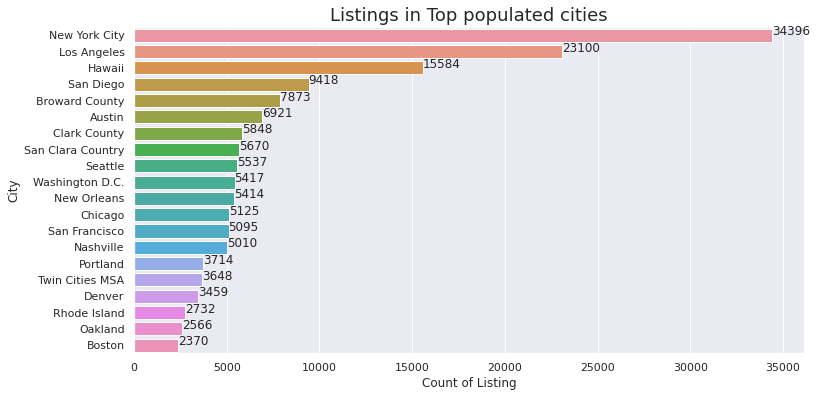

In [105]:
#Listings in Top populated cities [PS]

city_count = airbnb_df2.city.value_counts().iloc[:20]

sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(y="city", data=airbnb_df2, order=airbnb_df2.city.value_counts().iloc[:20].index)
plt.title("Listings in Top populated cities", size=18)
plt.xlabel('Count of Listing')
plt.ylabel('City')

#data value labels 
for index, data in enumerate(city_count):
  plt.text(x=data, y=index, s=f"{data}")

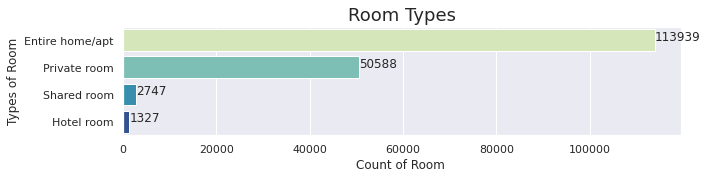

In [106]:
# Distribution of room types [PS]

rm_count = airbnb_df2.room_type.value_counts()

sns.set(rc={'figure.figsize':(10,2)})
sns.countplot(y="room_type", data=airbnb_df2, order=airbnb_df2.room_type.value_counts().iloc[:20].index, palette="YlGnBu")
plt.title("Room Types", size=18)
plt.xlabel('Count of Room ')
plt.ylabel('Types of Room')

#data value labels 
for index, data in enumerate(rm_count):
  plt.text(x=data, y=index, s=f"{data}")

#####State - New Variable

In [107]:
# Categorzing cities wrt states [PS]

state = {'Asheville':'NC','Austin':'TX','Boston':'MA','Broward County':'FL','Cambridge':'MA','Chicago':'IL','Clark County':'NV','Columbus':'OH','Denver':'CO','Hawaii':'HI','Jersey City':'NJ',
             'Los Angeles':'SC','Nashville':'TN','New Orleans':'MS','New York City':'NY','Oakland':'CA','Pacific Grove':'CA','Portland':'OR','Rhode Island':'RI','Salem':'MA','San Clara Country':'CA',
             'Santa Cruz County':'CA','San Diego':'CA','San Francisco':'CA','San Mateo County':'CA','Seattle':'WA','Twin Cities MSA':'MN','Washington D.C.':'DC'}

# creating a new state variable 

airbnb_df2['state'] = airbnb_df2['city'].apply(lambda x : state[x])
state

{'Asheville': 'NC',
 'Austin': 'TX',
 'Boston': 'MA',
 'Broward County': 'FL',
 'Cambridge': 'MA',
 'Chicago': 'IL',
 'Clark County': 'NV',
 'Columbus': 'OH',
 'Denver': 'CO',
 'Hawaii': 'HI',
 'Jersey City': 'NJ',
 'Los Angeles': 'SC',
 'Nashville': 'TN',
 'New Orleans': 'MS',
 'New York City': 'NY',
 'Oakland': 'CA',
 'Pacific Grove': 'CA',
 'Portland': 'OR',
 'Rhode Island': 'RI',
 'Salem': 'MA',
 'San Clara Country': 'CA',
 'San Diego': 'CA',
 'San Francisco': 'CA',
 'San Mateo County': 'CA',
 'Santa Cruz County': 'CA',
 'Seattle': 'WA',
 'Twin Cities MSA': 'MN',
 'Washington D.C.': 'DC'}

In [108]:
#map shows the states with highest and lowest listings [PS]

st_count = airbnb_df2['state'].value_counts()
fig_list = px.choropleth(locations=st_count.index,locationmode="USA-states", scope="usa", color=st_count.values, title='Listings By State ', color_continuous_scale='RdBu_r')
fig_list.show(renderer="colab")



The 'Listings By State' map shows that New York has the highest listings and Ohio has the lowest listings.

####**Map based on Price**

In [109]:
import sys
print(sys.getrecursionlimit())

1000


In [110]:
#checking mean [lat, long] [PS]
print("latitude :", airbnb_df2.latitude.mean())
print("longitude :", airbnb_df2.longitude.mean())

latitude : 35.82190783896525
longitude : -102.9487015900943


In [111]:
# Sicne mean [lat ,long] is in decimal setting the coordinates [QY]

coord = [33, -103]

#airbnb listings on map without price outliers
map_folium = folium.Map(location = coord, zoom_start=3.5, tiles="OpenStreetMap", control_scale=True)
map_folium

#mapping price based on area
my_zip1 = zip(airbnb_df2['latitude'], airbnb_df2['longitude'], airbnb_df2['price'])
list_of_my_zip1 = list(my_zip1)

hm_layer1 = HeatMap(list_of_my_zip1,
                   min_opacity=0.1,
                   radius=6,
                   blur=4, 
                 )

map_folium.add_child(hm_layer1)
map_folium




In [112]:
#Price distribution by states [PS]

pr_count = airbnb_df2['price'].value_counts()
fig_pr = px.choropleth(locations=st_count.index,locationmode="USA-states", scope="usa", color=st_count.values, title='Price distribution By State', color_continuous_scale='Blues')
fig_pr.show(renderer="colab")

#not sure about it

The 'Price distribution By State' map shows that New York has high prices of airbnb.

######**Boxplot - NYC**

In [113]:
# what about log price? [QY]
## New York City 
df_ny = airbnb_df2[(airbnb_df2["city"] == "New York City")]

fig_ny = px.box(df_ny, y = "price", 
             color = "room_type", 
             title = "AirBnB Price Distribution of NYC")
fig_ny.show(renderer="colab")


## __3. Modeling__

####Data prep

In [38]:
# Tranferring data to new dataframe for modeling
airbnb_df3 = airbnb_df2
airbnb_df3.head()

id  host_id  latitude  longitude        room_type  price  \
0   38585   165529  35.65146  -82.62792     Private room     60   
1   80905   427027  35.59779  -82.55540  Entire home/apt    470   
2  108061   320564  35.60670  -82.55563  Entire home/apt     75   
3  155305   746673  35.57864  -82.59578  Entire home/apt     90   
4  160594   769252  35.61442  -82.54127     Private room    125   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                138               1.14   
1               1                114               1.03   
2              30                 89               0.81   
3               1                267               2.39   
4              30                 58               0.52   

   calculated_host_listings_count  availability_365       city state  
0                               1                 0  Asheville    NC  
1                              11               288  Asheville    NC  
2                               2               298  Asheville    NC  
3                               5                 0  Asheville    NC  
4                               1                 0  Asheville    NC

In [39]:
print(numeric_features) # numbers
nominal_features # characters ['room_type','city']

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


room_type             city
0          Private room        Asheville
1       Entire home/apt        Asheville
2       Entire home/apt        Asheville
3       Entire home/apt        Asheville
4          Private room        Asheville
...                 ...              ...
225936  Entire home/apt  Washington D.C.
225950  Entire home/apt  Washington D.C.
225955  Entire home/apt  Washington D.C.
225964  Entire home/apt  Washington D.C.
226002  Entire home/apt  Washington D.C.

[177428 rows x 2 columns]

In [40]:
#Converting nominal features into numbers using Label Encoder

for i in nominal_features:
  airbnb_df3[i] = airbnb_df3[i].astype('category')
#  instance of Label Encoder
le = LabelEncoder()
# fit_transform function to fit label
for i in nominal_features:
  airbnb_df3[i] = le.fit_transform(airbnb_df3[i])

airbnb_df3 = airbnb_df2
airbnb_df3.head()

id  host_id  latitude  longitude  room_type  price  minimum_nights  \
0   38585   165529  35.65146  -82.62792          2     60               1   
1   80905   427027  35.59779  -82.55540          0    470               1   
2  108061   320564  35.60670  -82.55563          0     75              30   
3  155305   746673  35.57864  -82.59578          0     90               1   
4  160594   769252  35.61442  -82.54127          2    125              30   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                138               1.14                               1   
1                114               1.03                              11   
2                 89               0.81                               2   
3                267               2.39                               5   
4                 58               0.52                               1   

   availability_365  city state  
0                 0     0    NC  
1               288     0    NC  
2               298     0    NC  
3                 0     0    NC  
4                 0     0    NC

###### Train Test Data

In [41]:
#
airbnb_master = airbnb_df3[['price', 'calculated_host_listings_count','availability_365', 'room_type', 'city','minimum_nights','number_of_reviews','reviews_per_month']].reset_index(drop=True)
airbnb_master.head()


price  calculated_host_listings_count  availability_365  room_type  city  \
0     60                               1                 0          2     0   
1    470                              11               288          0     0   
2     75                               2               298          0     0   
3     90                               5                 0          0     0   
4    125                               1                 0          2     0   

   minimum_nights  number_of_reviews  reviews_per_month  
0               1                138               1.14  
1               1                114               1.03  
2              30                 89               0.81  
3               1                267               2.39  
4              30                 58               0.52

4 new variables with 1 & 0 - 

In [42]:
X = airbnb_master.drop('price', axis=1)
y = airbnb_master['price']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X ,y , test_size=0.20, random_state=42)



####Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,np.ravel(y_train))
#Predications LinearRegression
Y_pred_model_lr=model_lr.predict(X_test)
Y_pred_model_lr

array([ 73.18464902,  75.85456792,  58.68386555, ..., 172.85259432,
       136.08497103, 147.36782272])

In [51]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred_model_lr))
print(f"Linear Regression Model RMSE: {round(RMSE, 4)}")

Linear Regression Model RMSE: 79.3201


In [52]:
from sklearn.metrics import mean_absolute_error
MEA = mean_absolute_error(y_test, Y_pred_model_lr)
print(f"Linear Regression Model MAE: {round(MEA, 4)}")

Linear Regression Model MAE: 58.2739


In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Y_pred_model_lr)
print('Linear Regression Model R2 Score',r2)

Linear Regression Model R2 Score 0.23649278158433684


In [54]:
linear_reg_pred = pd.DataFrame({"og_Price": y_test.values, "predicted_Price": Y_pred_model_lr})
linear_reg_pred.head(10)

og_Price  predicted_Price
0        61        73.184649
1       125        75.854568
2        16        58.683866
3       135       185.146979
4       300        79.823266
5        99        66.945589
6       128       188.805808
7        75        74.076136
8       257       171.780813
9        65        72.638059

Text(0.5, 1.0, 'LinearRegression')

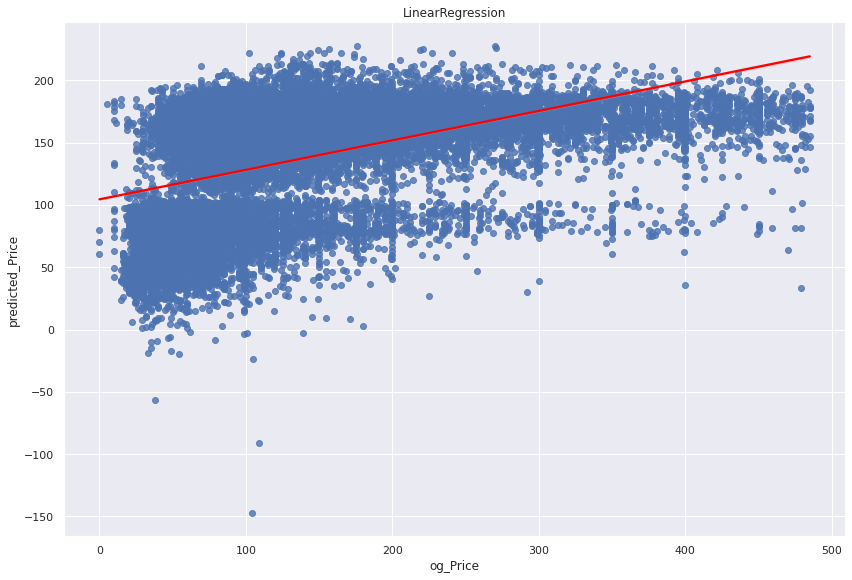

In [56]:

plt.figure(figsize=(20, 8.27))
sns.lmplot(x="og_Price",y="predicted_Price",data=linear_reg_pred,  palette="Set1",height=8, aspect=1.5,line_kws={'color': 'red'})

plt.title('LinearRegression')


####MARS


In [44]:
pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-68c_yd7n
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-68c_yd7n
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.


In [45]:
import pyearth

model = pyearth.Earth()

model.fit(X_train, np.ravel(y_train))
 # ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

Earth()

In [46]:
Y_pred_model = model.predict(X_test)
Y_pred_model

array([ 74.6094187 ,  77.14483659,  53.60073903, ..., 176.30133781,
       134.089284  , 142.69070493])

In [114]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred_model))
print(f"MARS Model RMSE: {round(RMSE, 4)}")

MARS Model RMSE: 79.0596


In [116]:
from sklearn.metrics import mean_absolute_error
MEA = mean_absolute_error(y_test, Y_pred_model)
print(f"MARS Model MAE: {round(MEA, 4)}")

MARS Model MAE: 58.0855


In [117]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Y_pred_model)
print('MARS Model R2 Score',r2)


MARS Model R2 Score 0.2414989479444255


####XGB

In [124]:
t = [('cat', OneHotEncoder(), ['room_type', 'city'])]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')

X_train1 = pd.DataFrame(col_transform.fit_transform(X_train).toarray())
X_train1.head(5)
X_test1 = pd.DataFrame(col_transform.fit_transform(X_test).toarray())
X_train1.head(5)

0    1    2    3    4    5    6    7    8    9   ...   27   28   29   30  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    31   32     33    34    35    36  
0  0.0  1.0    0.0   1.0  69.0  1.49  
1  0.0  2.0  364.0  30.0   3.0  0.08  
2  0.0  2.0  161.0  90.0   1.0  0.01  
3  0.0  1.0    0.0   3.0   3.0  0.35  
4  0.0  1.0    0.0   1.0   1.0  0.03  

[5 rows x 37 columns]

In [126]:
# Normalizing numerical data

mean = X_train1.mean(axis=0)
X_train1 -= mean
std = X_train1.std(axis=0)
X_train1 /= std
X_test1 -= mean
X_test1 /= std


In [127]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb = xgb.XGBRegressor(random_state=4, colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=10, n_estimators=500)

model_xgb.fit(X_train1, y_train)

# predictions
y_pred_train1 = model_xgb.predict(X_train1)
y_pred_test1 = model_xgb.predict(X_test1)

[23:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [128]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test1))
print(f"XGBoost Model RMSE: {round(RMSE, 4)}")

XGBoost Model RMSE: 71.2464


In [129]:
MEA = mean_absolute_error(y_test, y_pred_test1)
print(f"XGBoost Model MAE: {round(MEA, 4)}")

XGBoost Model MAE: 50.1792


In [130]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test1)
print('XGBoost Model R2 Score',r2)

XGBoost Model R2 Score 0.3840110527872209
